In [9]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error
from scipy import stats
from pmdarima.arima import auto_arima
import math

In [10]:
data = []

df = pd.read_excel('C:/Users/katya/OneDrive/Рабочий стол/_/НГТУ/8 семестр/КМ/новые_данные.xlsx',index_col=None, header=None)
for i in range (0,len(df)):
    data.append(round(df.values[i][0],2))

In [11]:
# Разделяем выборку на обучающую и тестовую для построения модели
data_ = pd.Series(data) # Временной ряд

n_train = 70
n_test = 10

data_train = data_[len(data_)-n_train-n_test:-n_test]
data_test = data_[-n_test:]

In [12]:
# Определение оптимальных параметров модели ARIMA
print("Оптимальные параметры\n", auto_arima(data_train))

Оптимальные параметры
  ARIMA(2,0,2)(0,0,0)[0] intercept


In [13]:
# Создаём модель ARIMA
model = ARIMA(data_train, order =(3, 0, 2))
modelfit = model.fit()
#print(modelfit.summary())

mse  0.018772089637096187


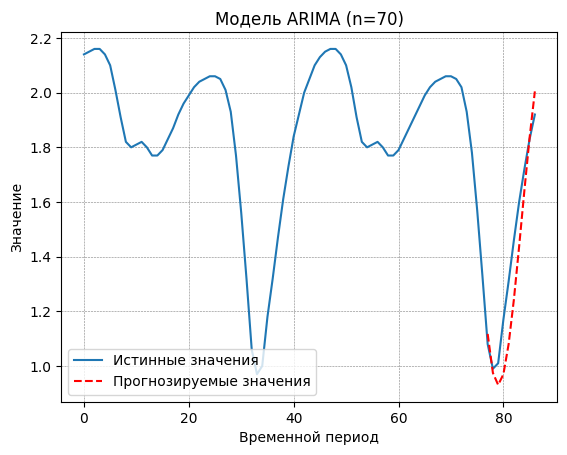

In [14]:
#predictions = modelfit.predict()
predictions = modelfit.predict(start=len(data_train), end=len(data_train)+len(data_test)-1)
mse = mean_squared_error(data_test, predictions)

print('mse ', mse)

# Отображение результатов на графике
plt.plot(data_, label='Истинные значения')
plt.plot(predictions, "--", color='red', label='Прогнозируемые значения')
plt.xlabel('Временной период')
plt.ylabel('Значение')
plt.title('Модель ARIMA (n={})'.format(n_train))
plt.grid(True, linestyle='--', linewidth=0.4, color='gray')

plt.legend(loc=3)
plt.show()

In [15]:
# Цикличная проверка некоторых параметров
pq_list = [[2,2],[3,1],[3,2],[4,0]]
n_train_list = [30,45,60,70]

for n_train in n_train_list:
    print('/////////////')
    print('n_train', n_train)
    for pq in pq_list:
        p = pq[0]
        q = pq[1]
        # data_train = data_[-n_train:]
        data_train = data_[len(data_)-n_train-n_test:-n_test]
        model = ARIMA(data_train, order =(p, 0, q))
        modelfit = model.fit()
        predictions = modelfit.predict(start=len(data_train), end=len(data_train)+len(data_test)-1)
        #predictions = modelfit.predict()
        # Расчет MSE и среднего квадратического отклонения
        mse = mean_squared_error(data_test, predictions)

        print('p, q =', p,q)
        print('n_train', n_train)
        print('mse', round(mse,2))
        print('----')

/////////////
n_train 30
p, q = 2 2
n_train 30
mse 0.08
----
p, q = 3 1
n_train 30
mse 0.1
----
p, q = 3 2
n_train 30
mse 0.04
----
p, q = 4 0
n_train 30
mse 1.43
----
/////////////
n_train 45
p, q = 2 2
n_train 45
mse 0.39
----
p, q = 3 1
n_train 45
mse 0.07
----
p, q = 3 2
n_train 45
mse 0.0
----
p, q = 4 0
n_train 45
mse 0.43
----
/////////////
n_train 60
p, q = 2 2
n_train 60
mse 0.02
----
p, q = 3 1
n_train 60
mse 0.02
----
p, q = 3 2
n_train 60
mse 0.03
----
p, q = 4 0
n_train 60
mse 0.02
----
/////////////
n_train 70
p, q = 2 2
n_train 70
mse 0.01
----
p, q = 3 1
n_train 70
mse 0.02
----
p, q = 3 2
n_train 70
mse 0.02
----
p, q = 4 0
n_train 70
mse 0.01
----
